In [13]:
import pandas as pd
train_df = pd.read_csv('/content/Titanic_train.csv')
test_df = pd.read_csv('/content/Titanic_test.csv')
combined_df = pd.concat([train_df.drop('Survived', axis=1), test_df], ignore_index=True)

In [14]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [15]:
combined_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,1014


In [31]:
missing_combined_df=test_df.isna().sum().sort_values(ascending=False)
print("Missing values (combined_df):")
display(combined_df[combined_df>0])

Missing values (combined_df):


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.000000,1.0,NaN,7.2500,True,NaN,True
1,1,38.000000,1.0,NaN,71.2833,NaN,NaN,NaN
2,3,26.000000,NaN,NaN,7.9250,NaN,NaN,True
3,1,35.000000,1.0,NaN,53.1000,NaN,NaN,True
4,3,35.000000,NaN,NaN,8.0500,True,NaN,True
...,...,...,...,...,...,...,...,...
1304,3,29.881138,NaN,NaN,8.0500,True,NaN,True
1305,1,39.000000,NaN,NaN,108.9000,NaN,NaN,NaN
1306,3,38.500000,NaN,NaN,7.2500,True,NaN,True
1307,3,29.881138,NaN,NaN,8.0500,True,NaN,True


<Figure size 800x400 with 0 Axes>

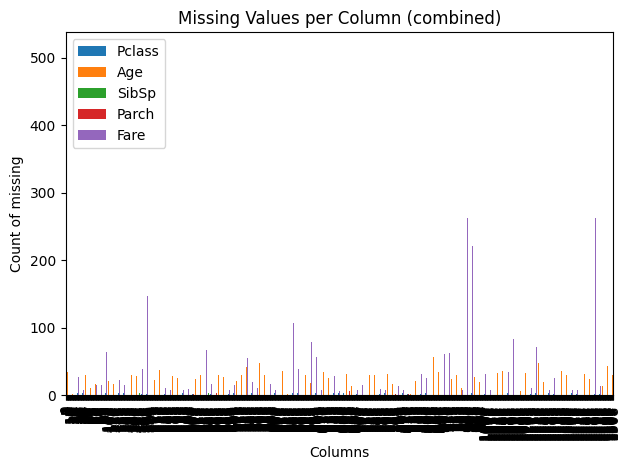

In [32]:
import matplotlib.pyplot as plt
mv=combined_df[combined_df > 0]
if len(mv) > 0:
    plt.figure(figsize=(8,4))
    mv.plot(kind='bar')
    plt.title("Missing Values per Column (combined)")
    plt.ylabel("Count of missing")
    plt.xlabel("Columns")
    plt.tight_layout()
    plt.show()

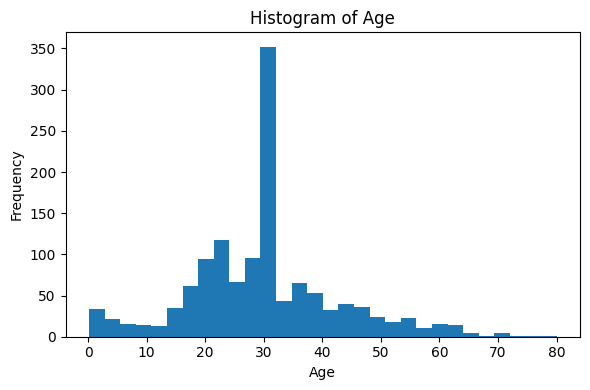

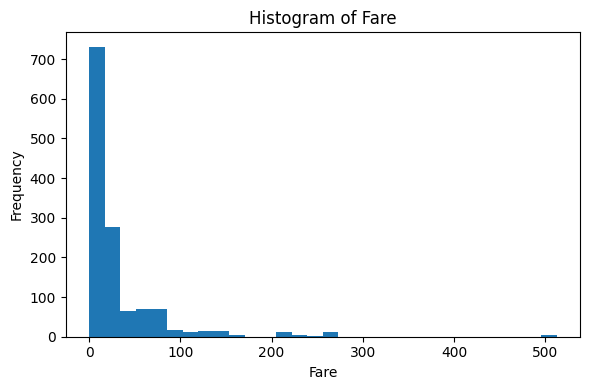

In [33]:
for col in ["Age", "Fare"]:
    if col in combined_df.columns:
        plt.figure(figsize=(6,4))
        combined_df[col].dropna().plot(kind='hist', bins=30)
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

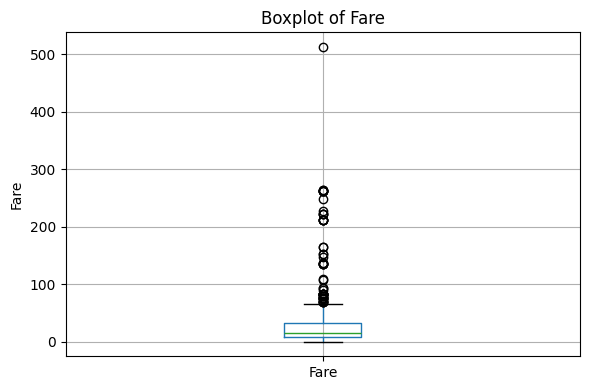

In [34]:
if "Fare" in combined_df.columns:
    plt.figure(figsize=(6,4))
    test_df[["Fare"]].boxplot()
    plt.title("Boxplot of Fare")
    plt.ylabel("Fare")
    plt.tight_layout()
    plt.show()

In [16]:
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [17]:
combined_df['Age'].fillna(combined_df['Age'].mean(), inplace=True)
combined_df['Fare'].fillna(combined_df['Fare'].mean(), inplace=True)
combined_df['Embarked'].fillna(combined_df['Embarked'].mode()[0], inplace=True)
combined_df = combined_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
# One-hot encode the categorical variables 'Sex' and 'Embarked'
combined_df = pd.get_dummies(combined_df, columns=['Sex', 'Embarked'], drop_first=True)
preprocessed_train_df = combined_df.iloc[:len(train_df)]
preprocessed_test_df = combined_df.iloc[len(train_df):]
X = preprocessed_train_df
y = train_df['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nShape of preprocessed data:")
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"preprocessed_test_df shape: {preprocessed_test_df.shape}")


Shape of preprocessed data:
X_train shape: (712, 8)
X_val shape: (179, 8)
preprocessed_test_df shape: (418, 8)


/tmp/ipython-input-2096831155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['Age'].fillna(combined_df['Age'].mean(), inplace=True)
/tmp/ipython-input-2096831155.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [18]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb_model.fit(X_train, y_train)
lgb_model = lgb.LGBMClassifier(objective='binary', metric='binary_logloss', random_state=42)
lgb_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [04:38:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(metric='binary_logloss', objective='binary', random_state=42)

In [19]:
xgb_pred = xgb_model.predict(X_val)
lgb_pred = lgb_model.predict(X_val)
print("XGBoost Model Performance:")
print(classification_report(y_val, xgb_pred))
print("\nLightGBM Model Performance:")
print(classification_report(y_val, lgb_pred))

XGBoost Model Performance:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179


LightGBM Model Performance:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       105
           1       0.81      0.80      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

